# Introduction

This year, we will run the practical exercises in Python, a powerful interpreted language. Python is being increasingly used in machine learning research, as it is fast, portable, has a clean syntax and sports a large collection of scientific software libraries. 

In order to deal with the more advanced mathematics that we deal with in this course, we make use of a few python libraries:

* numpy, which allows us to work with vectors and matrices
* scipy, which gives us access to scientific algorithms
* matplotlib, which allows us to plot our results

For this introduction, we will run our practical exercises within a "*notebook*": an interactive web page that integrates both code and text, allowing us to combine the code with documentation. In this case, you will edit this notebook to write your code and provide answers to the questions. Much of the documentation for python and its libraries can be found online. In particular, you should be able to do the exercises described in this document with the information available at http://scipy.org/docs.html

Before we start, let's load the libraries that we will need for this exercise.

This introductory exercise is not graded.

In [1]:
# The following line makes sure that when we plot stuff it shows up in the notebook
%matplotlib inline 

#import scipy.io as sio          # Allow for the import of Matlab files
import scipy.stats as stats     # Statistics module
import numpy as np              # Module for, among others, matrix operations
import matplotlib.pyplot as plt # Plotting
       
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Basic stuff

Let's start by playing around a little with some data. Start by loading the variables saved in the file "*data.npz*". This can be done using the "**numpy.load**" command. This file contains multible variables, which can be accessed as elements of a dictionary structure. In the following, we will refer to these variables by their key in the file, so for example, $v$ refers to the vector that you can access as *data['v']* if you called your dictionary "data".

Answer the following questions:

1. What is the order of $v$?
1. Compute the 2-norm $|v|^2$ of $v$. Notice that v is relatively large, which can lead to out-of-memory errors if you're not careful. Check out the *numpy.matrix.dot()* function.
1. use *%time* to check how long the computation takes, and report the results
1. How many elements of v are larger than 1? How many are larger than $2, 3,\dots,5$?

In [2]:
d = np.load("data.npz")

v = d['v']
print v[:3,:]
print len(v)
%time np.linalg.norm(v, 2)

print len(np.where( v > 1 )[0])
print len(np.where( v > 2 )[0])
print len(np.where( v > 3 )[0])
print len(np.where( v > 4 )[0])
print len(np.where( v > 5 )[0])


[[ 0.32404813]
 [-0.01890886]
 [-0.63216776]]
200000
Wall time: 42 ms
31834
4472
262
9
0


## Plotting

Plot, in the range $[-5\dots 5]$, the Gaussiab PDFs with parameters $(\mu=0,\sigma=1), (\mu=0, \sigma=2), (\mu=0, \sigma=3)$. Use the functions *plt.plot*, *stats.norm.pdf* and *plt.legend*


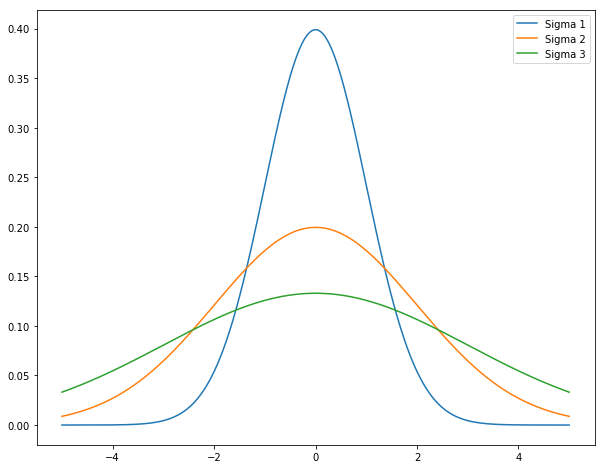

In [46]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.norm(0,1).pdf(x), label='Sigma 1')
plt.plot(x, stats.norm(0,2).pdf(x), label='Sigma 2')
plt.plot(x, stats.norm(0,3).pdf(x), label='Sigma 3')
plt.legend()

## Playing with matrices and Python

Plot a normalised histogram of the elements in vector v2 using 20 bins, and superimpose a plot, in the range $[−5, \dots , 5]$ of the Gaussian distribution with the mean and variance of the data. Use the built-in functions to compute these. In particular, use **np.mean** and **np.cov** to fit the parameters to the data.

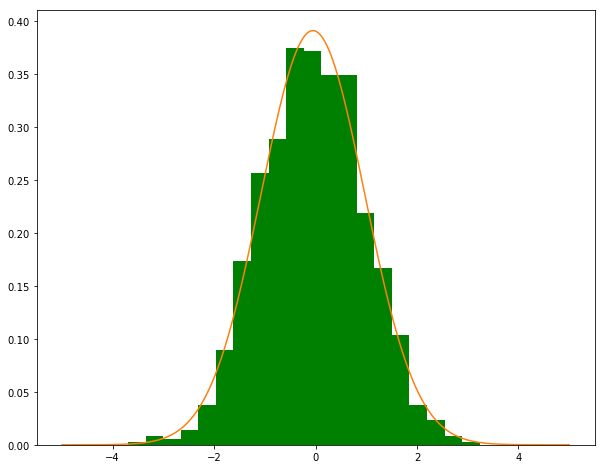

In [57]:
v2 = d['v2']
x = np.linspace(-5, 5, 1000)
plt.hist(v2, 20, normed=True, facecolor='green')
plt.plot(x, stats.norm(np.mean(v2),np.var(v2)).pdf(x), label='Sigma 1')


Get information on the *np.cov* function using the **help** function. This function does not provide you with the maximum likelihood estimators (MLE) of the parameters. For the Gaussian function, the MLE are 

$$\boldsymbol{\mu} = \frac{\sum_{n=1}^N \mathbf{x}_n}{N}$$ 

and

$$\boldsymbol{\Sigma} = \frac{\sum_{n=1}^N (\mathbf{x}_n-\boldsymbol{\mu})^2}{N}$$

Compute these parameters by hand and compare the values you obtain to those returned by the built-in function. How does your implementation compare in terms of execution speed?
    

In [73]:
#help(np.cov)
import math

def sigma(da):
    mu = sum(da) / len(da)
    sig = 0
    for i in da:
        sig += math.pow((i - mu), 2)
    return sig / len(da)

v2 = d['v2']
mu = sum(v2) / len(v2)

%time sum(v2) / len(v2)
%time np.mean(v2)

%time sigma(v2)
%time np.var(v2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 458 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 58.9 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.32 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 155 µs


1.0207916312497081

# Visualising 2D data

Load the dataset in **data-2class.npz**. This file contains a set of 2-dimensional points $d$, and a corresponding set of labels $l$

1. Create a 2D scatterplot of $d$, using red for the elements with corresponding label 0, and blue for $l_i=1$
1. Draw a straight line separating the two classes
1. Fit two 2D Gaussian distributions, to the points with label $l_i=0$ and $l_i=1$. 
1. Create a heatmap plotting these two distributions and superimpose a scatterplot of the data. 



In [5]:
d = np.load('data-2class.npz')
print d['d'][:3,:]
print d['l'][:3]

[[ 1.13809416  1.74621778]
 [ 0.66388952 -0.11174715]
 [ 0.41700615  0.37692954]]
[[ 0.]
 [ 0.]
 [ 0.]]


"\nmean0 = np.mean(classes[0])\nvar0 = np.mean(classes[0])\n\nmean = np.mean(classes[0], axis=0)\ncov = np.cov(classes[0], rowvar=0)\n\ndatac0 = np.random.multivariate_normal(mean, cov, 1000)\nxc0, yc0 = zip(*datac0)\n\nplt.hexbin(xc0, yc0, gridsize=20, cmap='Reds')\nmean1 = np.mean(classes[1])\nvar1 = np.var(classes[1])\n"

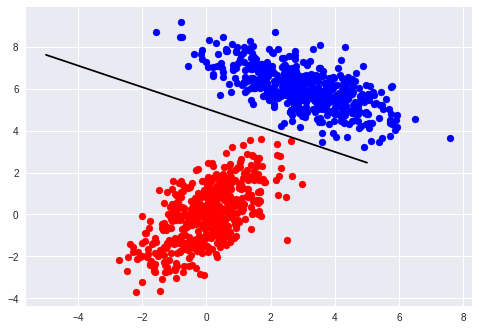

In [144]:
#ax.scatter(*zip(*d['d']))
classes = {0: [], 1: []}
for i in range(0, len(d['d'])):
    if d['l'][i] == 0:
        classes[0].append(d['d'][i])
    else:
        classes[1].append(d['d'][i])

x, y = zip(*classes[0])


plt.scatter(*zip(*classes[0]), color='red')
plt.scatter(*zip(*classes[1]), color='blue')

from sklearn import svm

mu_vec1 = np.mean(classes[0], axis=0)
cov_mat1 = np.cov(classes[0], rowvar=0)
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 5000)

mu_vec2 = np.mean(classes[1], axis=0)
cov_mat2 = np.cov(classes[1], rowvar=0)
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 5000)

x1 = zip(*classes[0])
x2 = zip(*classes[1])

X = np.concatenate((x1_samples,x2_samples), axis = 0)
Y = np.array([0]*5000 + [1]*5000)

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

"""
mean0 = np.mean(classes[0])
var0 = np.mean(classes[0])

mean = np.mean(classes[0], axis=0)
cov = np.cov(classes[0], rowvar=0)

datac0 = np.random.multivariate_normal(mean, cov, 1000)
xc0, yc0 = zip(*datac0)

plt.hexbin(xc0, yc0, gridsize=20, cmap='Reds')
mean1 = np.mean(classes[1])
var1 = np.var(classes[1])
"""